In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('combined_df_resampled.csv', index_col=['Depth'])

In [6]:
df.drop('well_name', axis=1).head(5)

,Vp,Vs,RHOB,SWE,VSH
Depth,,,,,
202.6,2.322,0.774,2.04,0.21,0.0
203.0,2.317,0.749,2.02,0.21,0.0
203.1,2.317,0.745,2.03,0.21,0.0
203.5,2.282,0.760,2.02,0.21,0.0
207.4,2.342,0.849,2.04,0.18,0.0


In [816]:
df.describe()

,Vp,Vs,RHOB,SWE,VSH
count,2641.000000,2641.000000,2641.000000,2641.000000,2641.000000
mean,2.286235,0.861186,2.127664,0.607978,0.304578
std,0.203910,0.200776,0.098091,0.306558,0.283339
min,1.846000,0.386000,1.270000,0.150000,0.000000
25%,2.171000,0.767000,2.070000,0.320000,0.060000
50%,2.290000,0.883000,2.130000,0.570000,0.210000
75%,2.376000,0.974000,2.180000,0.960000,0.540000
max,3.928000,1.812000,2.470000,1.000000,1.000000


In [818]:
df = df[
#     (df['PHIE'] > 0.05) & 
#     (df['PHIT'] > 0.1) & 
    (df['RHOB'] > 1.85) & 
#    (df['PHIT'] < 0.45) & 
    (df['Vs'] < 1.4) &
    (df['Vs'] > 0.55) #&
#     (df['SWT'] < 1)
       ]

In [819]:
df.describe()

,Vp,Vs,RHOB,SWE,VSH
count,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000
mean,2.295165,0.885037,2.128301,0.565905,0.275677
std,0.167227,0.142539,0.076438,0.296564,0.269771
min,1.846000,0.551000,1.860000,0.150000,0.000000
25%,2.209000,0.815000,2.070000,0.280000,0.050000
50%,2.308000,0.893000,2.120000,0.530000,0.180000
75%,2.380000,0.978000,2.180000,0.910000,0.440000
max,3.928000,1.388000,2.470000,1.000000,1.000000


In [820]:
df.columns

Index(['Vp', 'Vs', 'RHOB', 'SWE', 'VSH', 'well_name'], dtype='object')

df2 = df[['Death', 'Vp', 'Vs', 'PHIE', 'PHIT', 'RHOB', 'SWE', 'SWT',
       'VSH']]

df3 = df2.dropna().drop('Death', axis=1)

df3.describe()

In [821]:
df3 = df

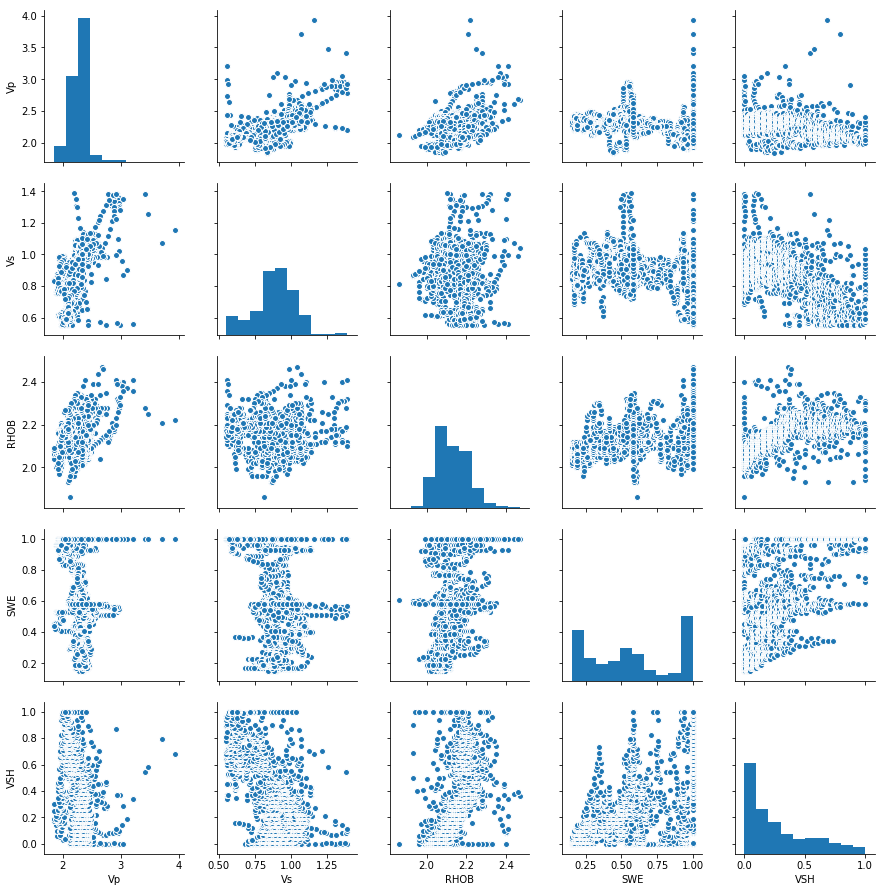

In [822]:
sns.pairplot(df3)

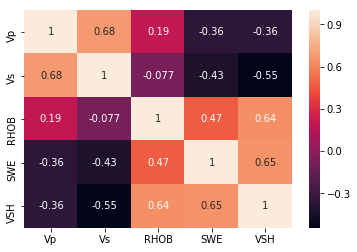

In [848]:
plot = sns.heatmap(df3.corr(), annot=True)
fig = plot.get_figure()
fig.savefig('correlation.png', height=1250)

C:\Users\Ahmad Reza\AppData\Local\conda\conda\envs\dashboard\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

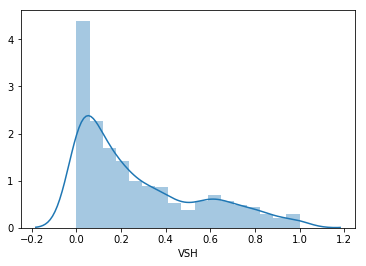

In [845]:
fig = sns.distplot(df3['VSH'])

In [825]:
df3.columns

Index(['Vp', 'Vs', 'RHOB', 'SWE', 'VSH', 'well_name'], dtype='object')

In [826]:
#X = df3[['Vp', 'PHIE', 'PHIT', 'RHOB', 'SWE', 'SWT', 'VSH']]
X = df3[['Vp', 'RHOB', 'SWE', 'VSH']]
#X = df3[['Vp', 'RHOB', 'SWT', 'VSH']] create bias
y = df3['Vs']

In [827]:
from sklearn.model_selection import train_test_split

In [828]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [829]:
from sklearn.linear_model import LinearRegression

In [830]:
lm =LinearRegression()

In [849]:
lm.fit(X_train, y_train)

TypeError: fit() got an unexpected keyword argument 'normalize'

In [832]:
print(lm.intercept_)

-0.36800724988986655


In [833]:
lm.coef_

array([ 0.4420799 ,  0.1416397 , -0.00541016, -0.21466852])

In [834]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [835]:
cdf

,Coeff
Vp,0.442080
RHOB,0.141640
SWE,-0.005410
VSH,-0.214669


In [836]:
predictions = lm.predict(X_test)

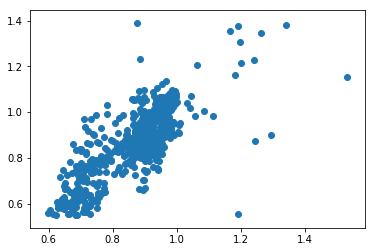

In [851]:
plt.scatter(predictions, y_test)

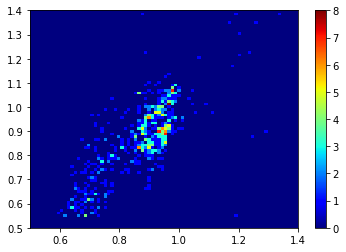

In [867]:
plt.hist2d(predictions, y_test, [80, 80], cmap=plt.cm.jet, range=[[0.5,1.4], [0.5, 1.4]])
plt.colorbar()


C:\Users\Ahmad Reza\AppData\Local\conda\conda\envs\dashboard\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


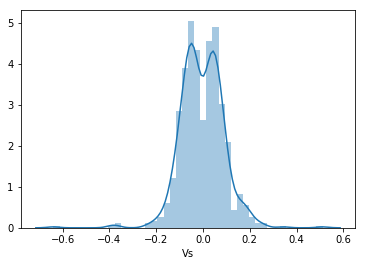

In [839]:
sns.distplot(y_test - predictions)

In [840]:
from sklearn import metrics

In [841]:
metrics.mean_absolute_error(y_test, predictions)

0.07079054930514683

In [842]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.09185865769714015